Topic #0: зенит чемпион россия локомотив стать чемпионат победа клуб кубок титул рпл подряд тур обладатель поздравить третий спартак счёт петербургский московский


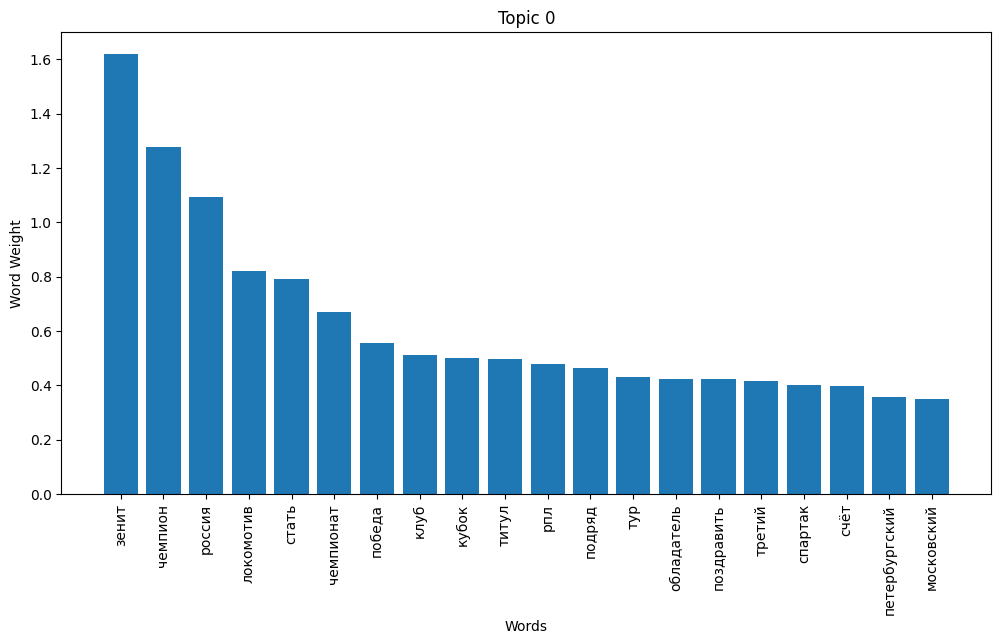

Topic #1: тимур хоккеист врач динамо ярославский ярославль травма шайба состояние молодёжный март хоккейный файзутдинов больница спортсмен капитан тяжёлый получить жизнь попасть


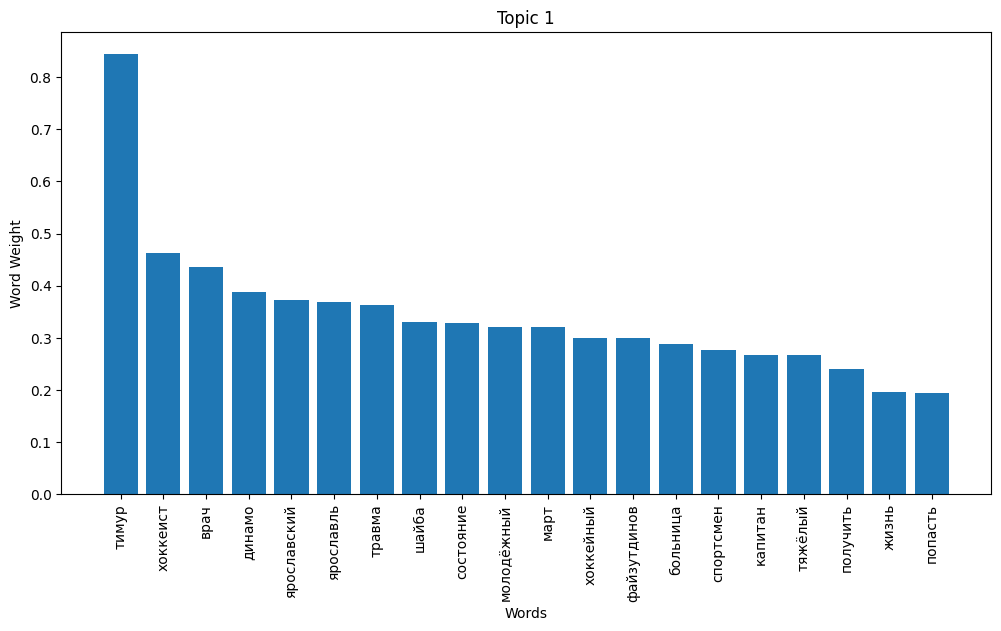

Topic #2: болельщик автобус отношение локомотив сектор сотрудник мера гостевой фк стадион правопорядок гость чрезмерный зенит матч билет массово факт жалоба полиция


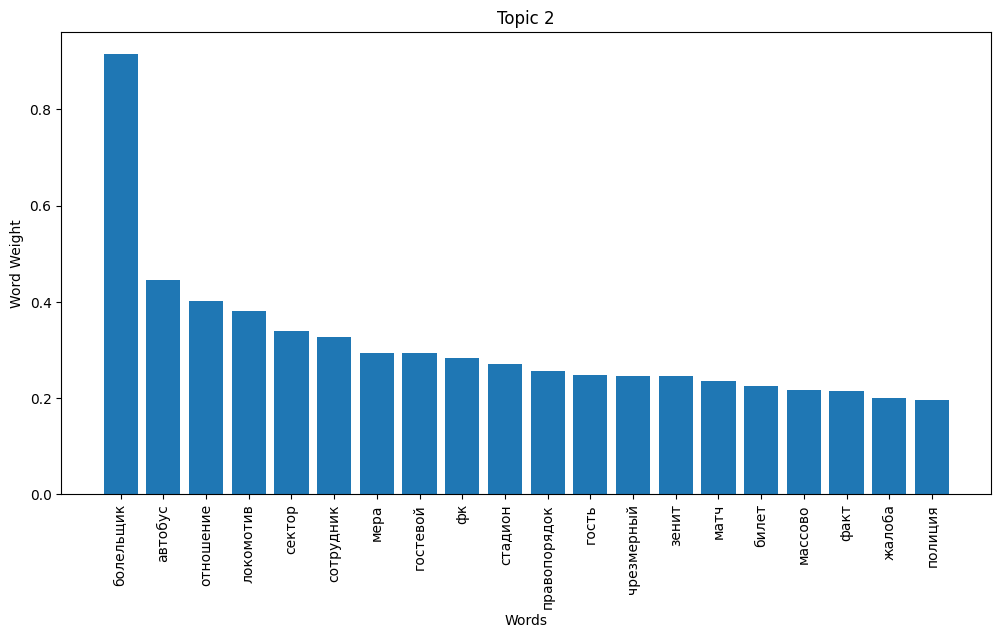

Topic #3: гол дзюба азмун мяч локомотив ворота зенит забить минута матч малкома арбитр камано первый рыбуса удар артём пропустить пабло рыбусы


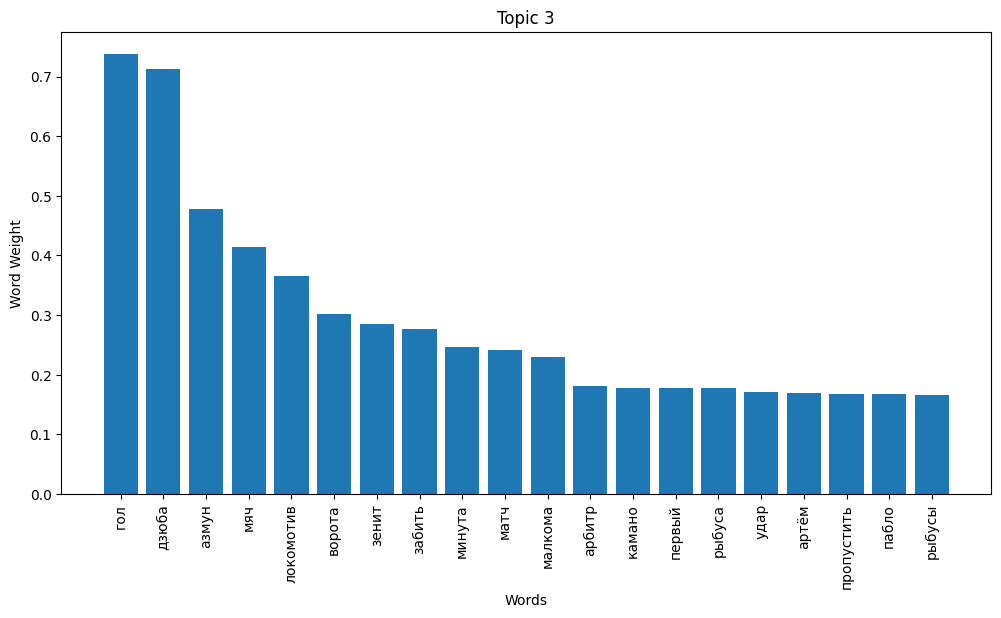

Topic #4: это всё мочь очень команда играть зенит случай говорить думать весь просто сказать ещё свой наумов сезон питерец конкурент год


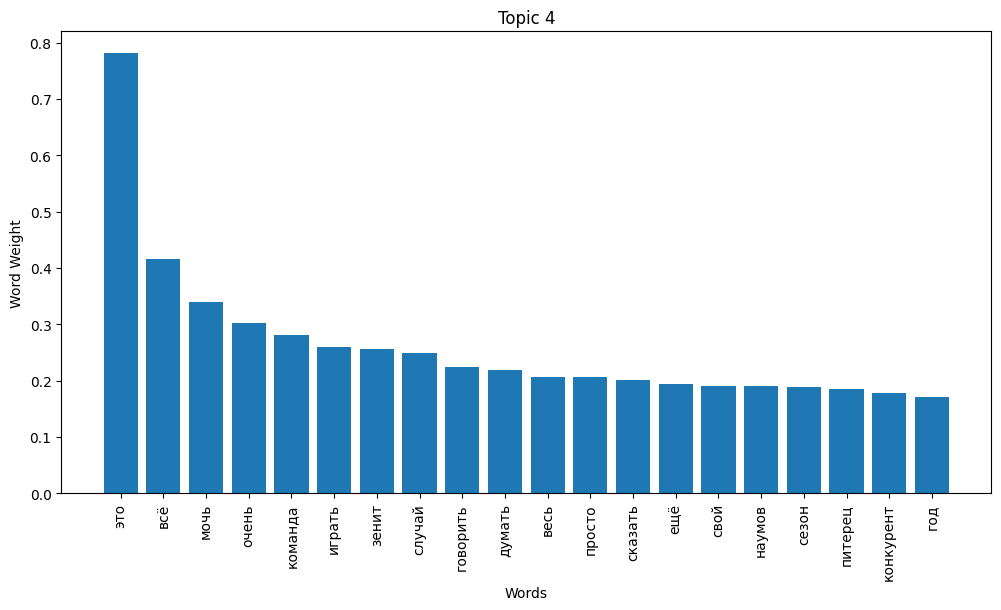

Topic #5: николич игра финал забыть локомотив марко сегодня неудачный тур опасный сказать повезти матч конец очень мяч команда зона разница следующий


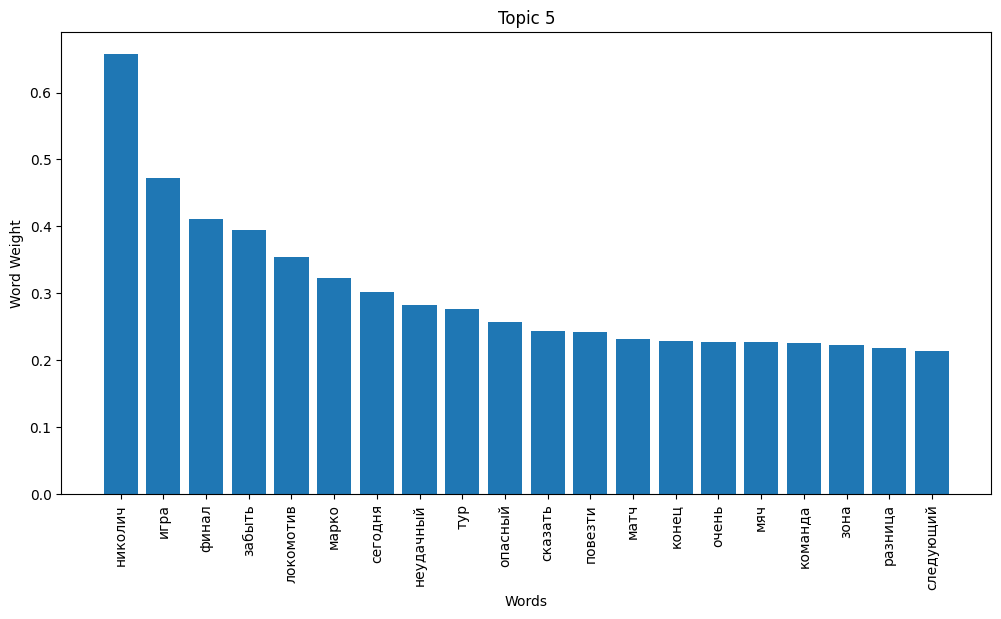

Topic #6: мхл файзутдин динамо файзутдинов март шайба голова хоккейный тимур защитник матч попасть попадание хоккеист вторник время против реанимация лига умереть


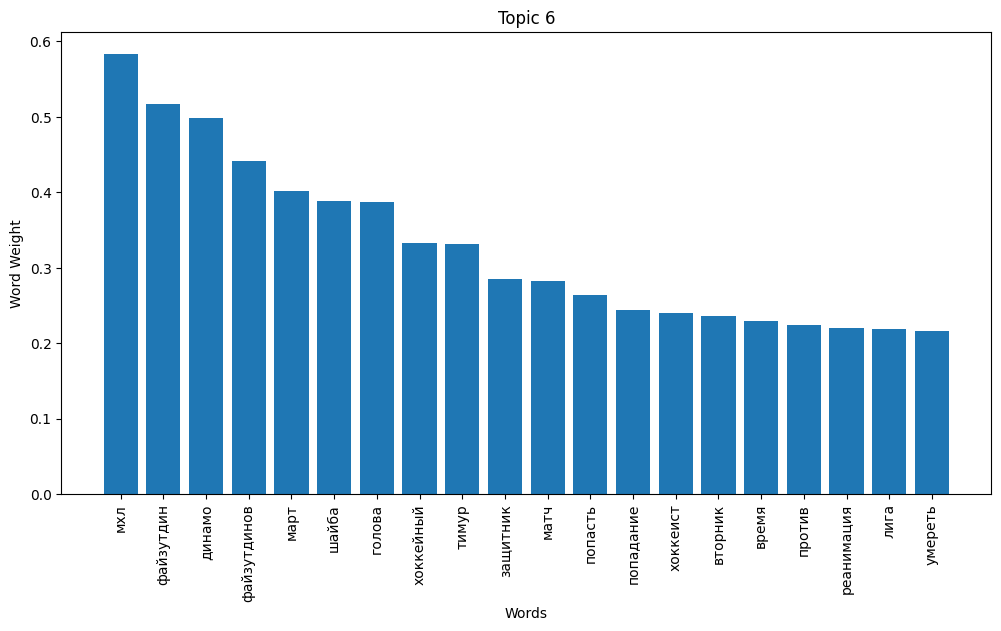

Topic #7: костюм дэдпул дзюба золотой медаль артём чемпионство награждение давно уметь комикс выйти самый третий нападать позволить чемпионский это хороший снять


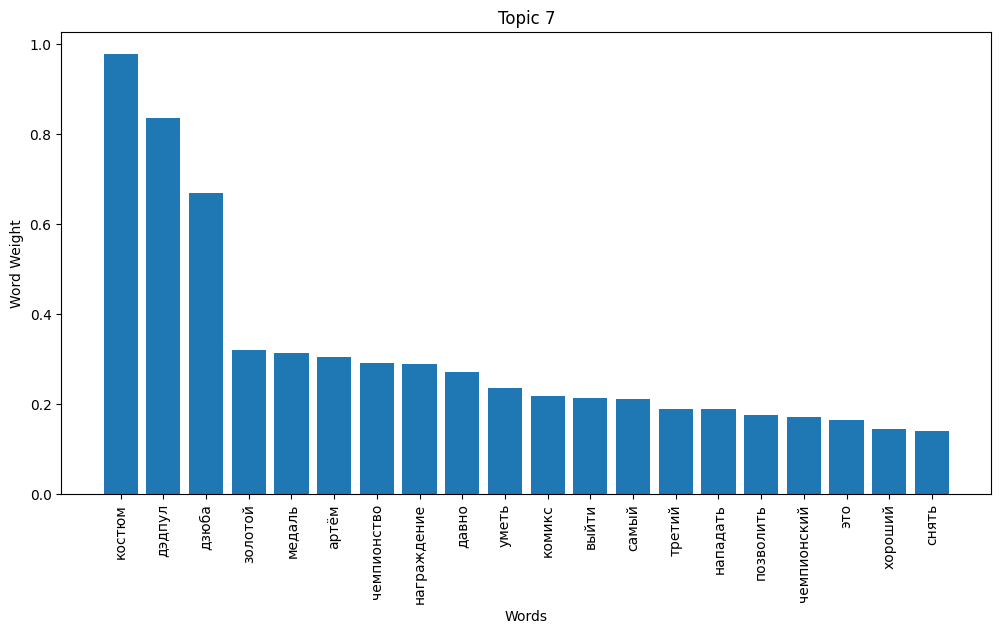

Topic #8: рфс болельщик заявление локомотив фк отношение рпл проверка омрачать ситуация зенит неуважительный организация праздник российский матч гостевой союз безопасность ограничительный


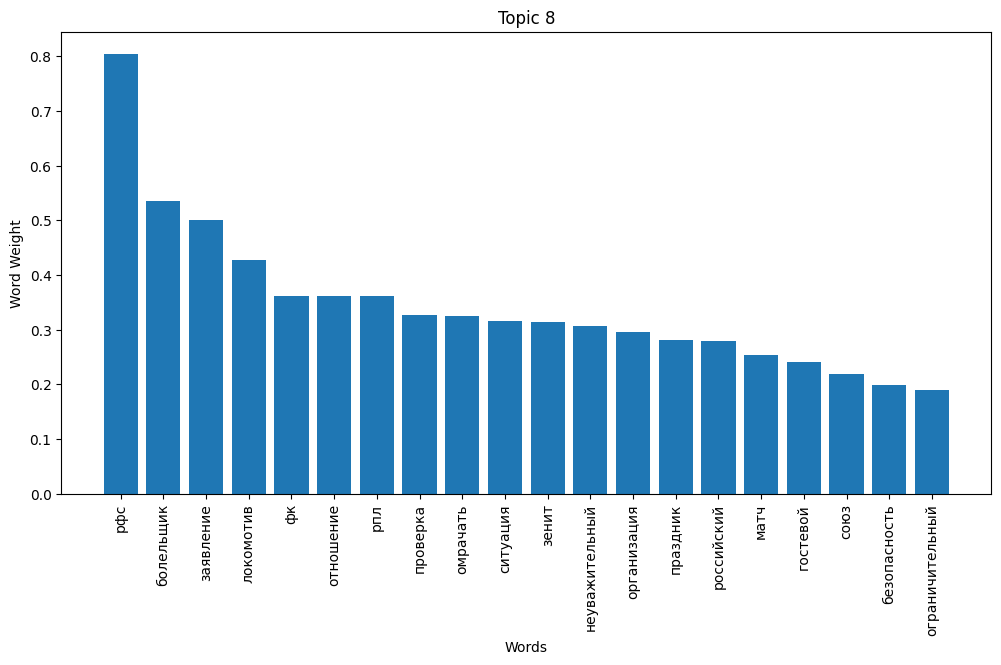

Topic #9: семак тренер сергей титул зенит сёмин россия завоевать чемпионат слуцкий чемпионство тренерский главный подряд сборная романцев цска газзаев третий черчёс


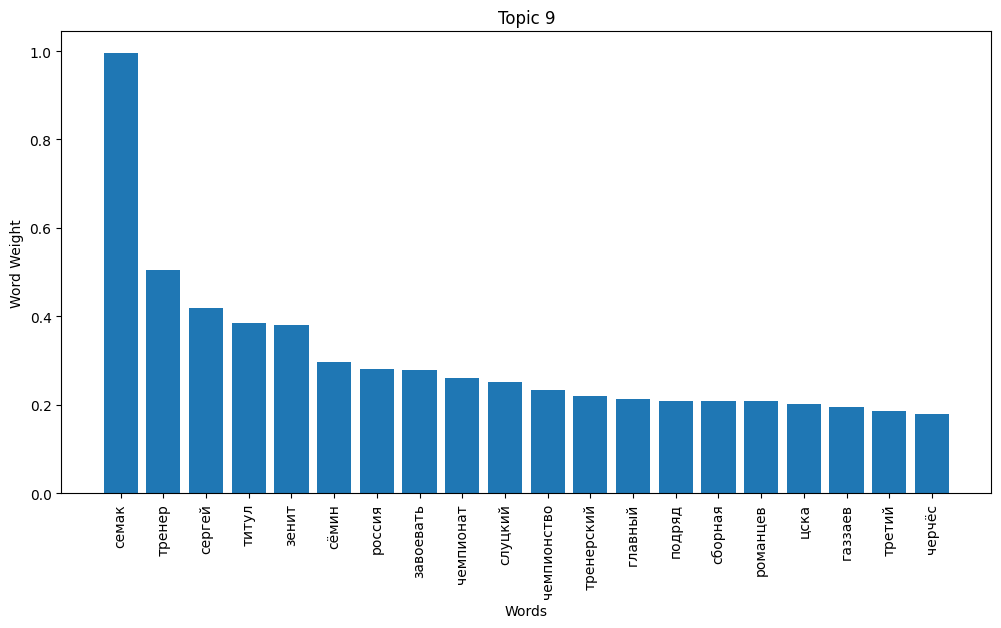


Topic #0: тимур динамо файзутдинов шайба хоккеист матч файзутдин март мхл болельщик хоккейный голова попасть это время ярославль врач ярославский игрок смерть


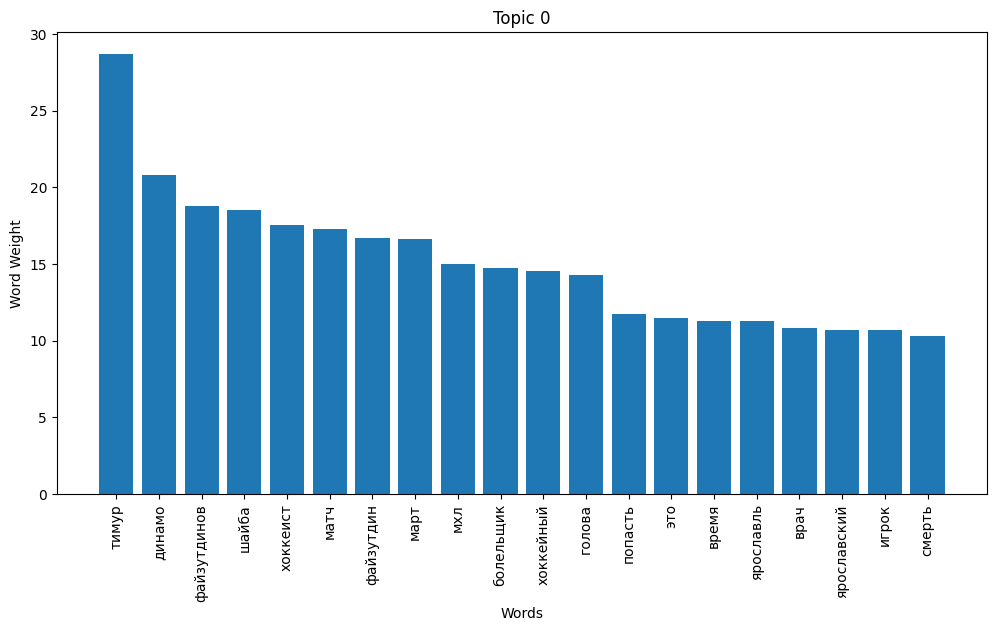

Topic #1: сделать россия азмун зенит сегодня файзутдин игра это действовать матч забыть пять мочь чемпионат очень трактор дзюба челябинский хороший дубль


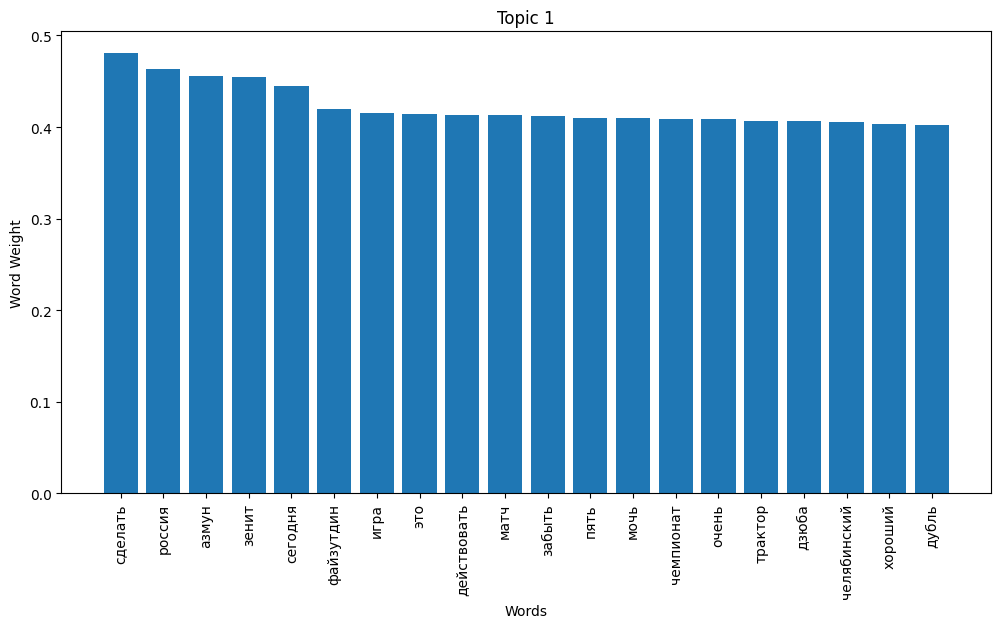

Topic #2: зенит россия стать локомотив чемпион семак это третий матч чемпионство титул чемпионат болельщик команда который подряд рпл сергей год победа


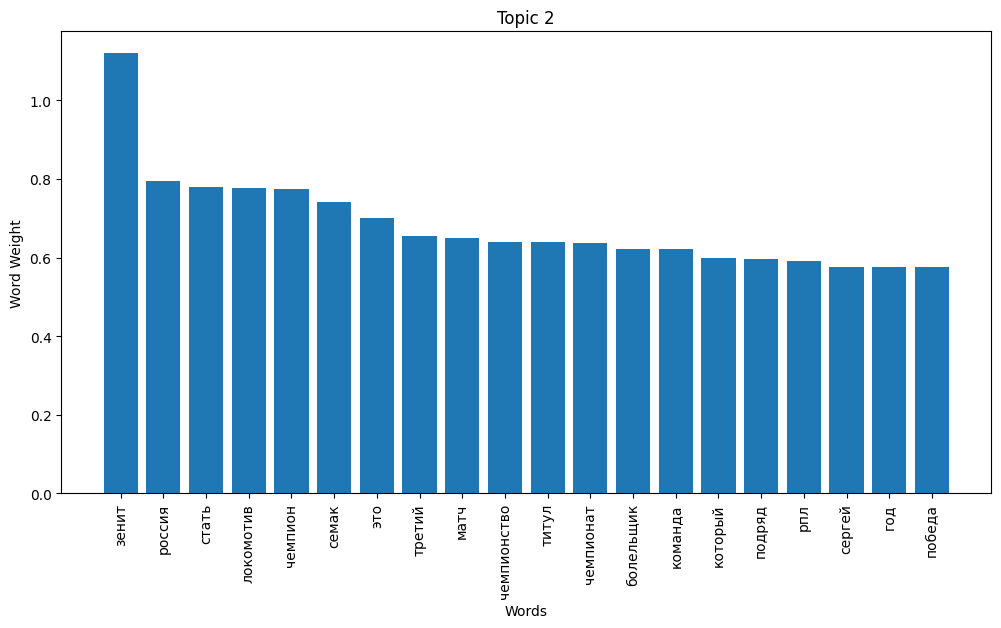

Topic #3: пора хотеться россия состояние кузяин прощание зенит день команда показать риа перерыв поздравить дуглас титул насколько хоккейный состав решить почему


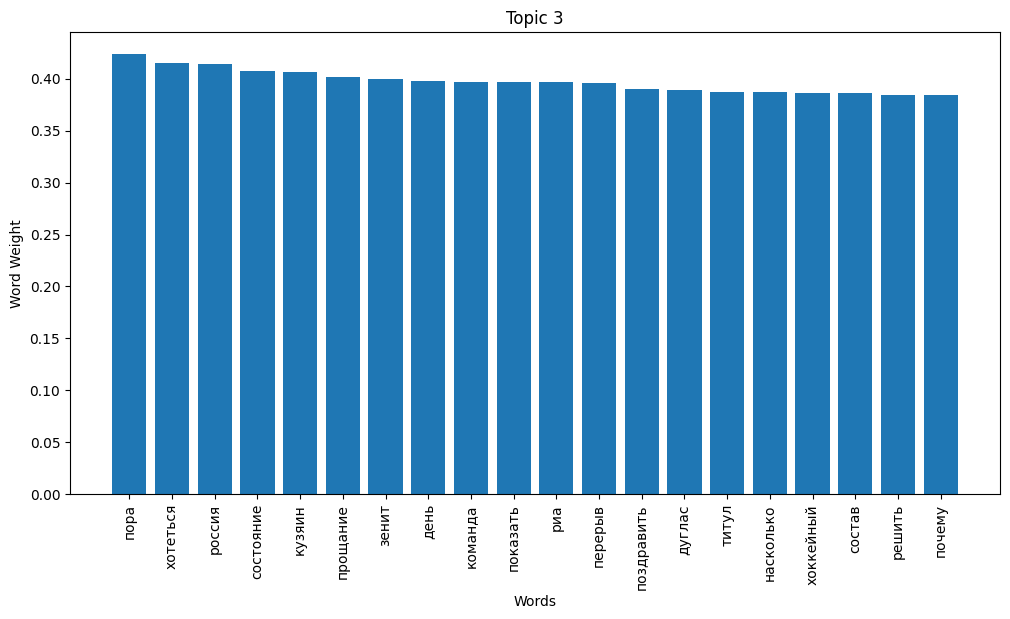

Topic #4: семак зенит чемпионство любить это чемпионат матч тренер команда спартак встреча говорить сергей наш чемпион который динамо хоккейный год локомотив


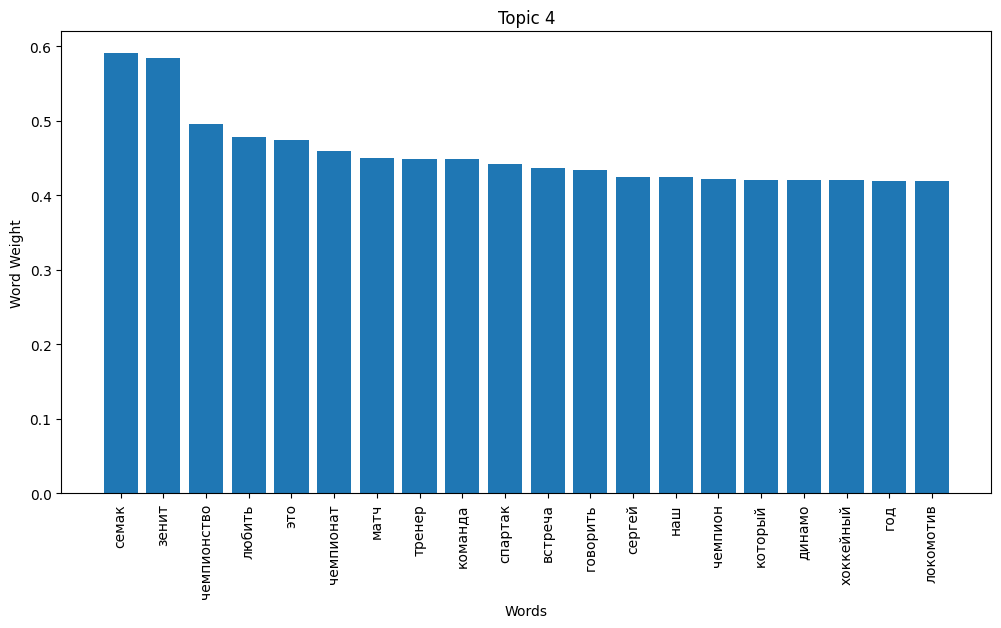

Topic #5: зенит тимур ярославский локомотив эксперт матч стать чувство питерский попасть дзюба идти тв петербургский хоккеист хотеться клуб чемпионский золото утром


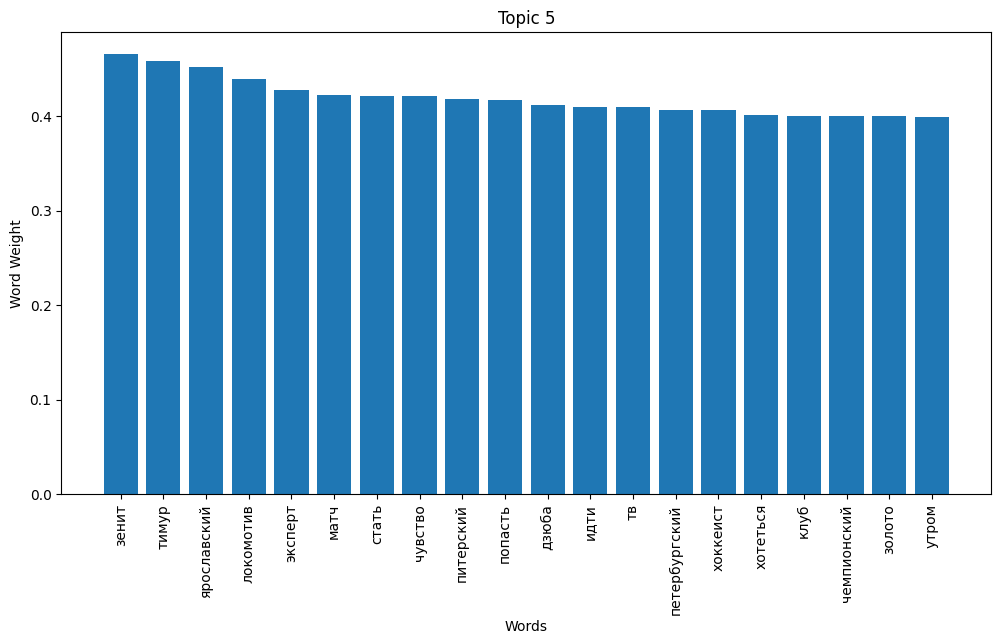

Topic #6: локомотив болельщик зенит рпл тур матч мера отношение проиграть чрезмерный билет баринов стадион проверка чемпионат май тинькофф выделить сторона покинуть


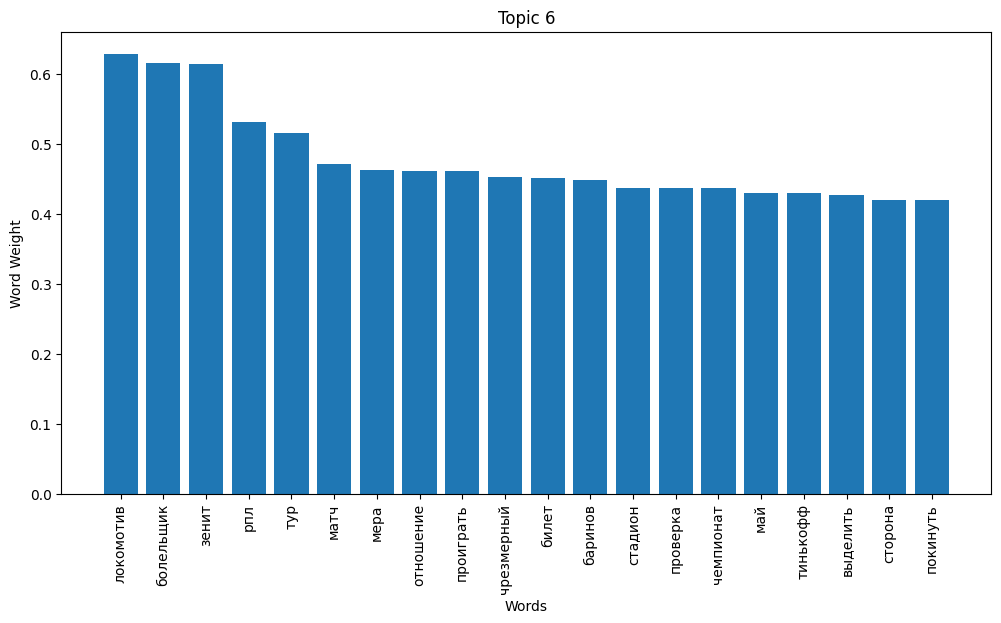

Topic #7: зенит локомотив это чемпион россия дзюба матч семак команда чемпионат стать победа рпл тур гол подряд чемпионство титул всё игра


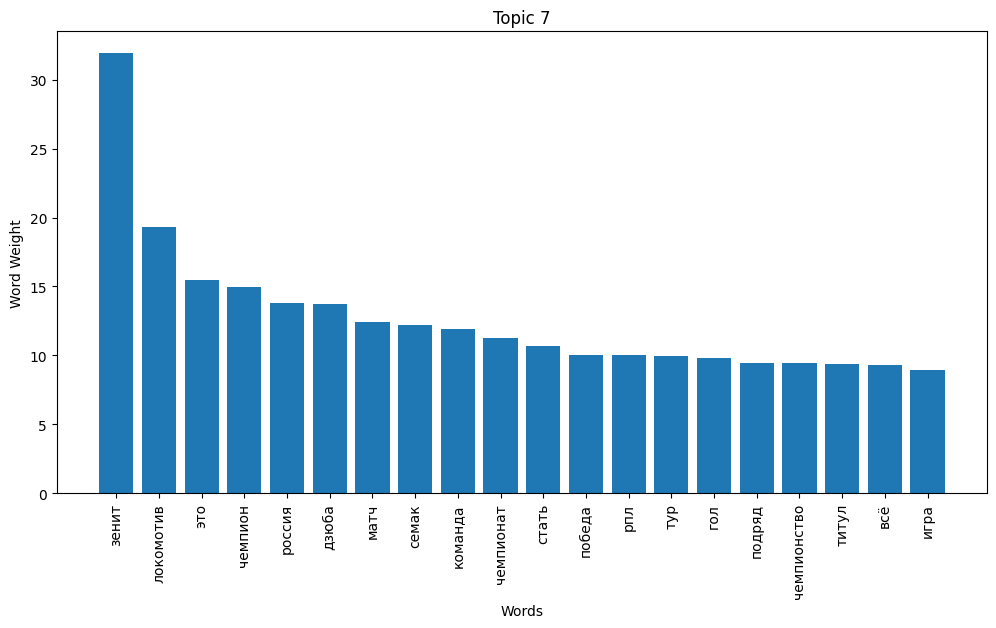

Topic #8: болельщик зенит это азмун локомотив матч чемпион мяч сотрудник футбольный сезон гол представитель спустя погибнуть март утром цска рекорд память


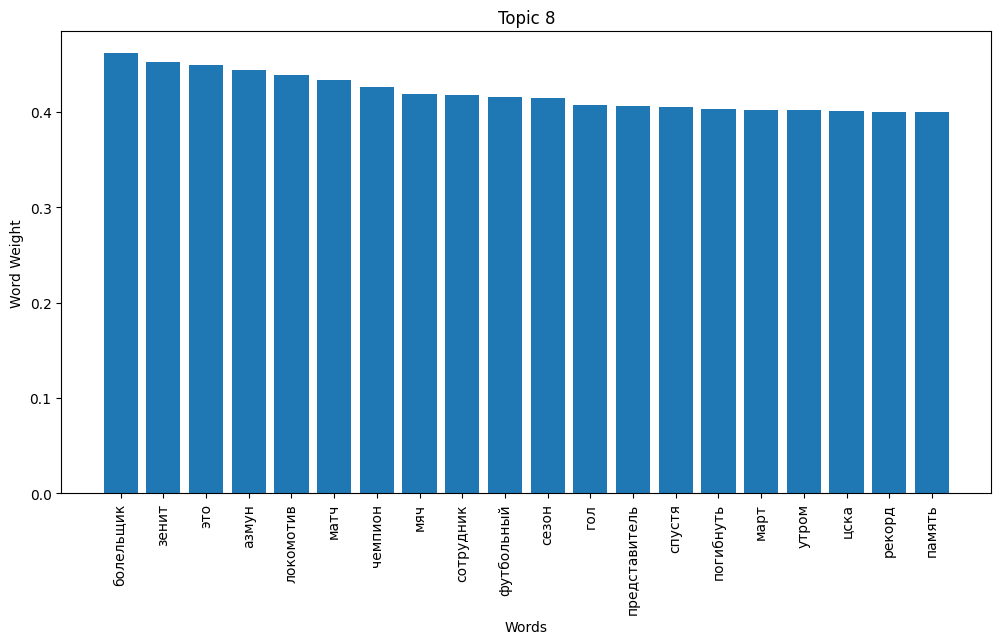

Topic #9: болельщик полиция локомотив сектор мвд автобус зенит гостевой мера весь вокзал матч действовать рфс стадион рамка предпринять правопорядок поклонник ребёнок


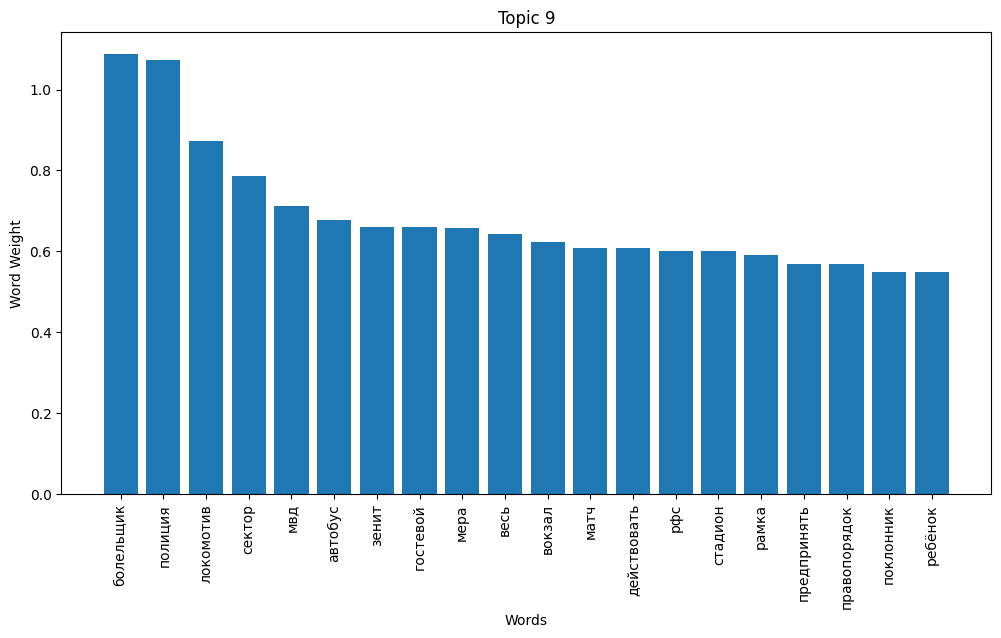

In [21]:
import os
import zipfile
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pymorphy3
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np

n_components = 10
n_top_words = 20

def preprocess_text(text):
    morph = pymorphy3.MorphAnalyzer()
    stop_words = set(stopwords.words('russian'))
    tokens = word_tokenize(text)
    tokens = [morph.parse(token)[0].normal_form for token in tokens if token.isalnum() and not token.isdigit()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

def plot_top_words(model, feature_names, n_top_words, title):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        message += " ".join([feature_names[i] for i in top_words_idx])
        print(message)
        sorted_topic = topic[top_words_idx]
        plt.figure(figsize=(12, 6))
        plt.bar(range(len(top_words_idx)), sorted_topic)
        plt.ylabel('Word Weight')
        plt.xlabel('Words')
        plt.title('Topic {}'.format(topic_idx))
        plt.xticks(range(len(top_words_idx)), [feature_names[i] for i in top_words_idx], rotation=90)
        plt.show()
    print()


if __name__ == '__main__':
    with zipfile.ZipFile('2021_SPORT.zip', 'r') as zip_ref:
        zip_ref.extractall('2021_SPORT')

    corpus = []
    for root, dirs, files in os.walk("2021_SPORT"):
        for file in files:
            with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                text = f.read()
                text = preprocess_text(text)
                corpus.append(text)

    tfidf_vectorizer = TfidfVectorizer(max_features=1000)
    tfidf = tfidf_vectorizer.fit_transform(corpus)
    
    nmf = NMF(n_components=n_components, random_state=1).fit(tfidf)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    plot_top_words(nmf, tfidf_feature_names, n_top_words, 'Topics in NMF model (Frobenius norm)')

    lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                    learning_method='online', learning_offset=50., random_state=0)
    lda.fit(tfidf)
    tf_feature_names = tfidf_vectorizer.get_feature_names_out()
    plot_top_words(lda, tfidf_feature_names, n_top_words, 'Topics in LDA model')